<h1><center>Breast Cancer Wisconsin Diagnostic Dataset </center></h1>

Biopsy features for classification of 569 malignant (cancer) and benign (not cancer) breast masses.
Features were computationally extracted from digital images of fine needle aspirate biopsy slides. Features correspond to properties of cell nuclei, such as size, shape and regularity. The mean, standard error, and worst value of each of 10 nuclear parameters is reported for a total of 30 features.

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:pink; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [0. Installation of libraries](#0)
* [1. Basic Data Overview](#1)
* [2. Analysis of data](#2)
* [3. EDA](#3)
* [4. Classification models](#4)

<a id="0"></a>
<h2 style='background:pink; border:0; color:white'><center>0. Installation of libraries</center><h2>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly 
import plotly.express as px
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()

from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import torch

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="1"></a>
<h2 style='background:pink; border:0; color:white'><center>1. Basic Data Overview</center><h2>

In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv")
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273.9   
3           4         13.030           18.42             82.61        523.8   
4           5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  ...  x.texture_worst  \
0            0.047810           0.1885  ...            19.26   
1            0.031100           0.1967  ...            20.49   
2            0.020760           0.1815  ...            15.66   
3            0.029230           0.1467  ...            22.81   
4            0.005917           0.1769  ...            21.96   

   x.perimeter_worst  x.area_worst  x.smoothness_worst  x.compactness_worst  \
0              99.70         711.2             0.14400              0.17730   
1              96.09         630.5             0.13120              0.27760   
2              65.13         314.9             0.13240              0.11480   
3              84.46         545.9             0.09701              0.04619   
4              57.26         242.2             0.12970              0.13570   

   x.concavity_worst  x.concave_pts_worst  x.symmetry_worst  \
0            0.23900              0.12880            0.2977   
1            0.18900              0.07283            0.3184   
2            0.08867              0.06227            0.2450   
3            0.04833              0.05013            0.1987   
4            0.06880              0.02564            0.3105   

   x.fractal_dim_worst  y  
0              0.07259  B  
1              0.08183  B  
2              0.07773  B  
3              0.06169  B  
4              0.07409  B  

[5 rows x 32 columns]

In [4]:
df['y'].value_counts()

B    357
M    212
Name: y, dtype: int64

In [5]:
df.describe()

Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  \
count  569.000000     569.000000      569.000000        569.000000   
mean   285.000000      14.127292       19.289649         91.969033   
std    164.400426       3.524049        4.301036         24.298981   
min      1.000000       6.981000        9.710000         43.790000   
25%    143.000000      11.700000       16.170000         75.170000   
50%    285.000000      13.370000       18.840000         86.240000   
75%    427.000000      15.780000       21.800000        104.100000   
max    569.000000      28.110000       39.280000        188.500000   

       x.area_mean  x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
count   569.000000         569.000000          569.000000        569.000000   
mean    654.889104           0.096360            0.104341          0.088799   
std     351.914129           0.014064            0.052813          0.079720   
min     143.500000           0.052630            0.019380          0.000000   
25%     420.300000           0.086370            0.064920          0.029560   
50%     551.100000           0.095870            0.092630          0.061540   
75%     782.700000           0.105300            0.130400          0.130700   
max    2501.000000           0.163400            0.345400          0.426800   

       x.concave_pts_mean  x.symmetry_mean  ...  x.radius_worst  \
count          569.000000       569.000000  ...      569.000000   
mean             0.048919         0.181162  ...       16.269190   
std              0.038803         0.027414  ...        4.833242   
min              0.000000         0.106000  ...        7.930000   
25%              0.020310         0.161900  ...       13.010000   
50%              0.033500         0.179200  ...       14.970000   
75%              0.074000         0.195700  ...       18.790000   
max              0.201200         0.304000  ...       36.040000   

       x.texture_worst  x.perimeter_worst  x.area_worst  x.smoothness_worst  \
count       569.000000         569.000000    569.000000          569.000000   
mean         25.677223         107.261213    880.583128            0.132369   
std           6.146258          33.602542    569.356993            0.022832   
min          12.020000          50.410000    185.200000            0.071170   
25%          21.080000          84.110000    515.300000            0.116600   
50%          25.410000          97.660000    686.500000            0.131300   
75%          29.720000         125.400000   1084.000000            0.146000   
max          49.540000         251.200000   4254.000000            0.222600   

       x.compactness_worst  x.concavity_worst  x.concave_pts_worst  \
count           569.000000         569.000000           569.000000   
mean              0.254265           0.272188             0.114606   
std               0.157336           0.208624             0.065732   
min               0.027290           0.000000             0.000000   
25%               0.147200           0.114500             0.064930   
50%               0.211900           0.226700             0.099930   
75%               0.339100           0.382900             0.161400   
max               1.058000           1.252000             0.291000   

       x.symmetry_worst  x.fractal_dim_worst  
count        569.000000           569.000000  
mean           0.290076             0.083946  
std            0.061867             0.018061  
min            0.156500             0.055040  
25%            0.250400             0.071460  
50%            0.282200             0.080040  
75%            0.317900             0.092080  
max            0.663800             0.207500  

[8 rows x 31 columns]

<a id="2"></a>
<h2 style='background:pink; border:0; color:white'><center>2. Analysis of data</center><h2>

In [6]:
df = df.iloc[:, 1:]

In [7]:
def histplots(df, colored=False):
    k = 0
    cols = df.columns[:-1]
    n = 5
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            if colored:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, hue=df.columns[-1])
            else:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, color='g')
            k += 1

    plt.tight_layout()
    plt.show()

In [8]:
def boxplots(df):
    k = 0
    cols = df.columns[:-1]
    n = 5
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            sns.boxplot(df, x=df[df.columns[k]], ax=axes[i][j])
            k += 1

    plt.tight_layout()
    plt.show()

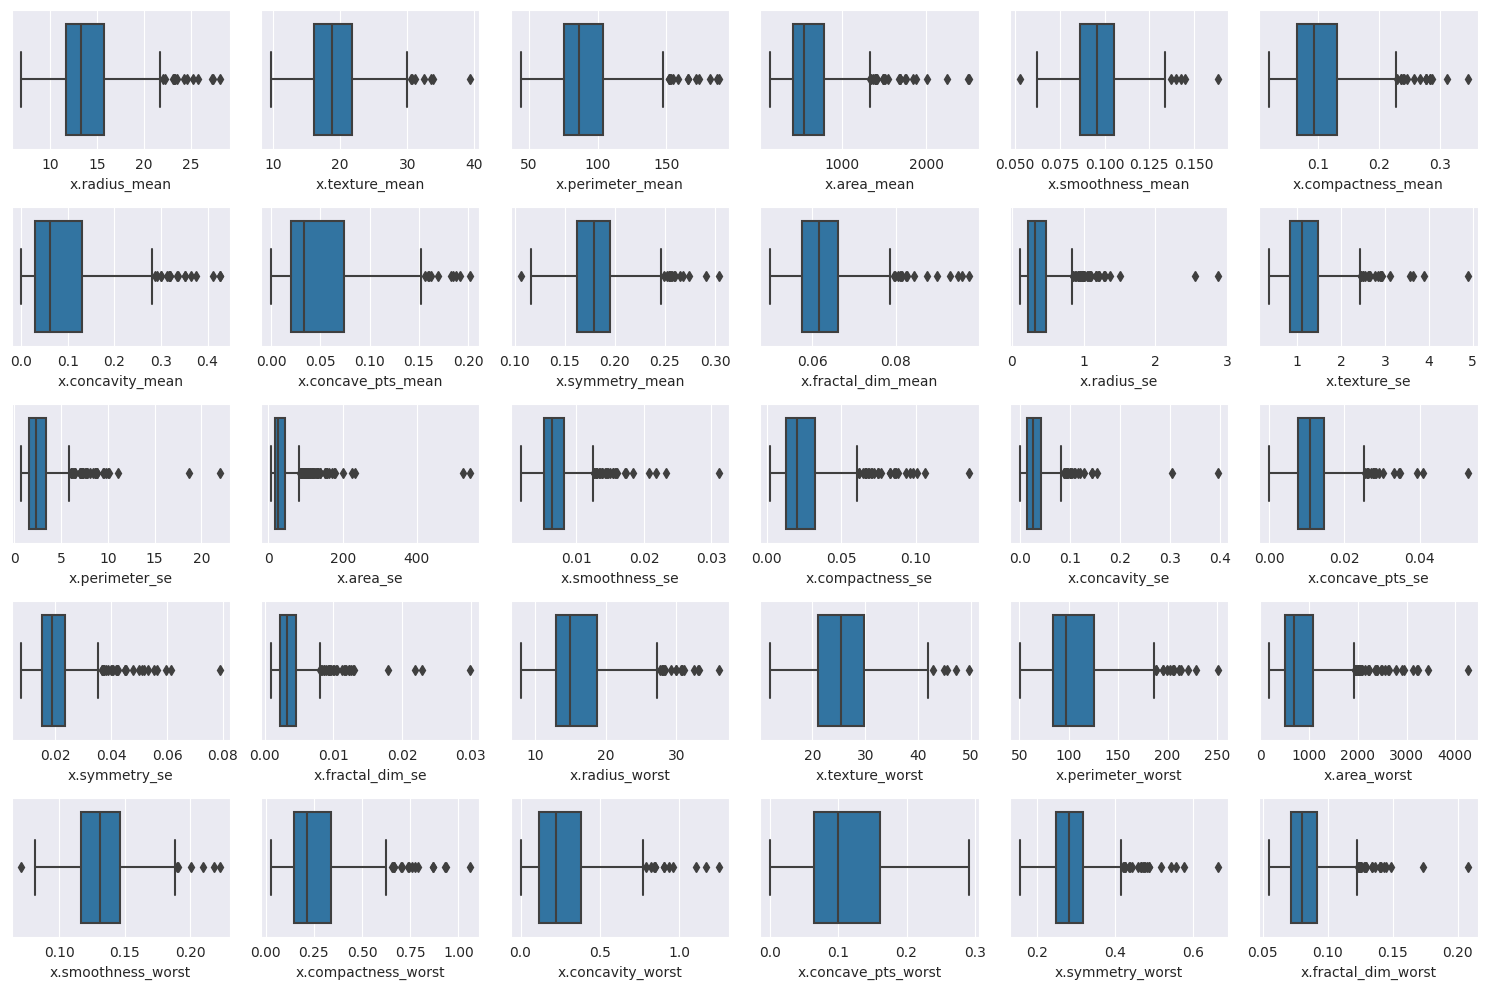

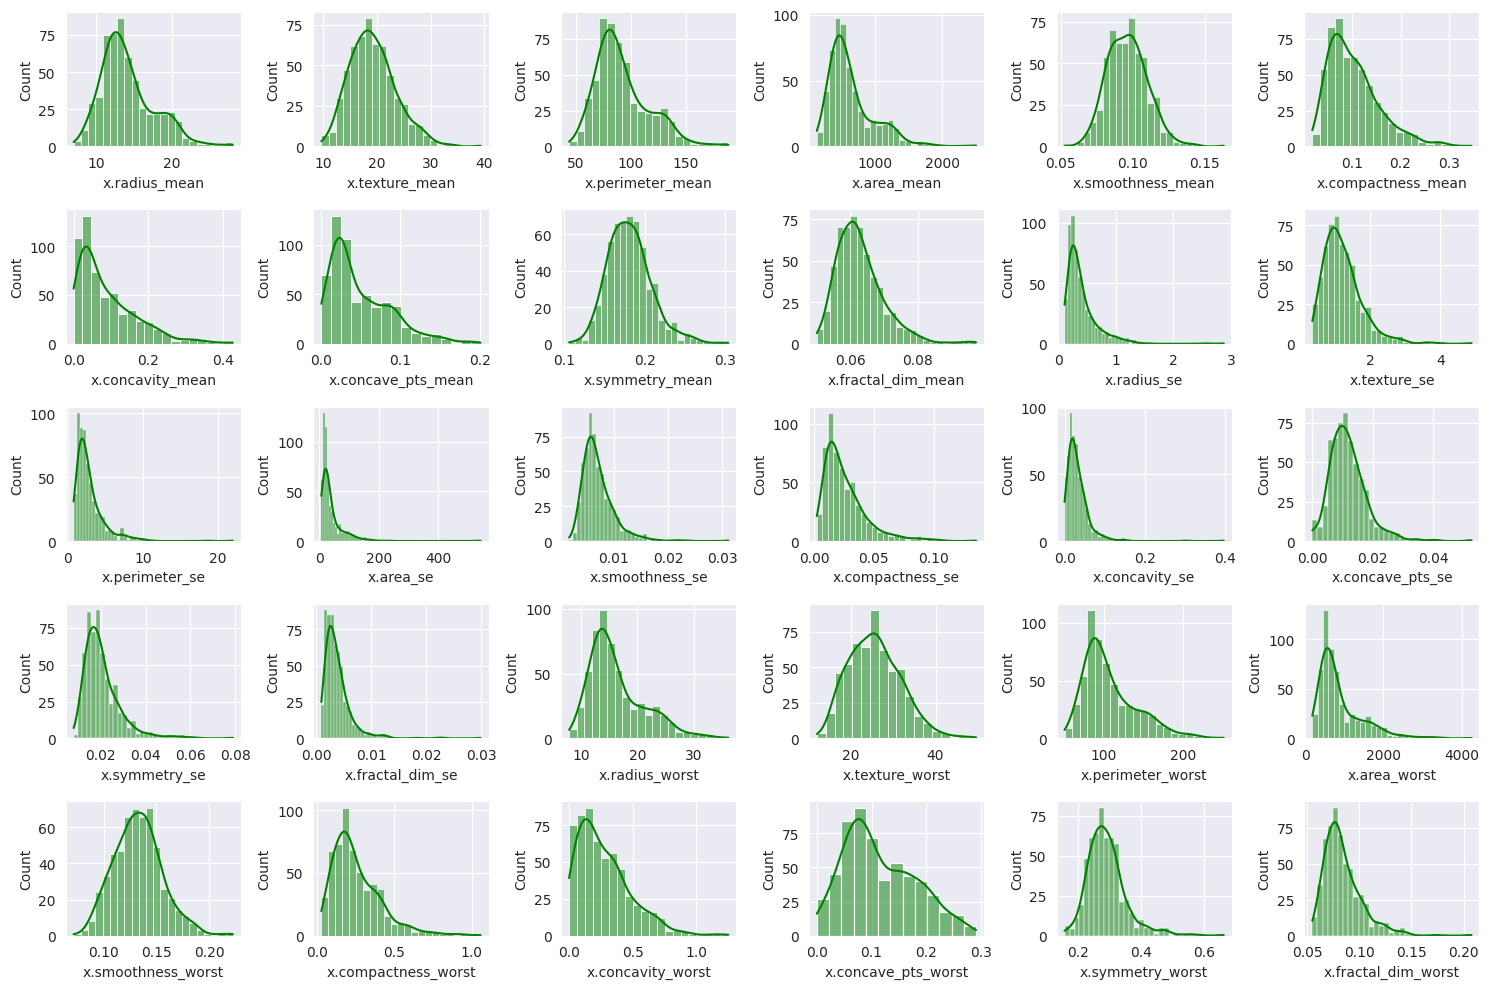

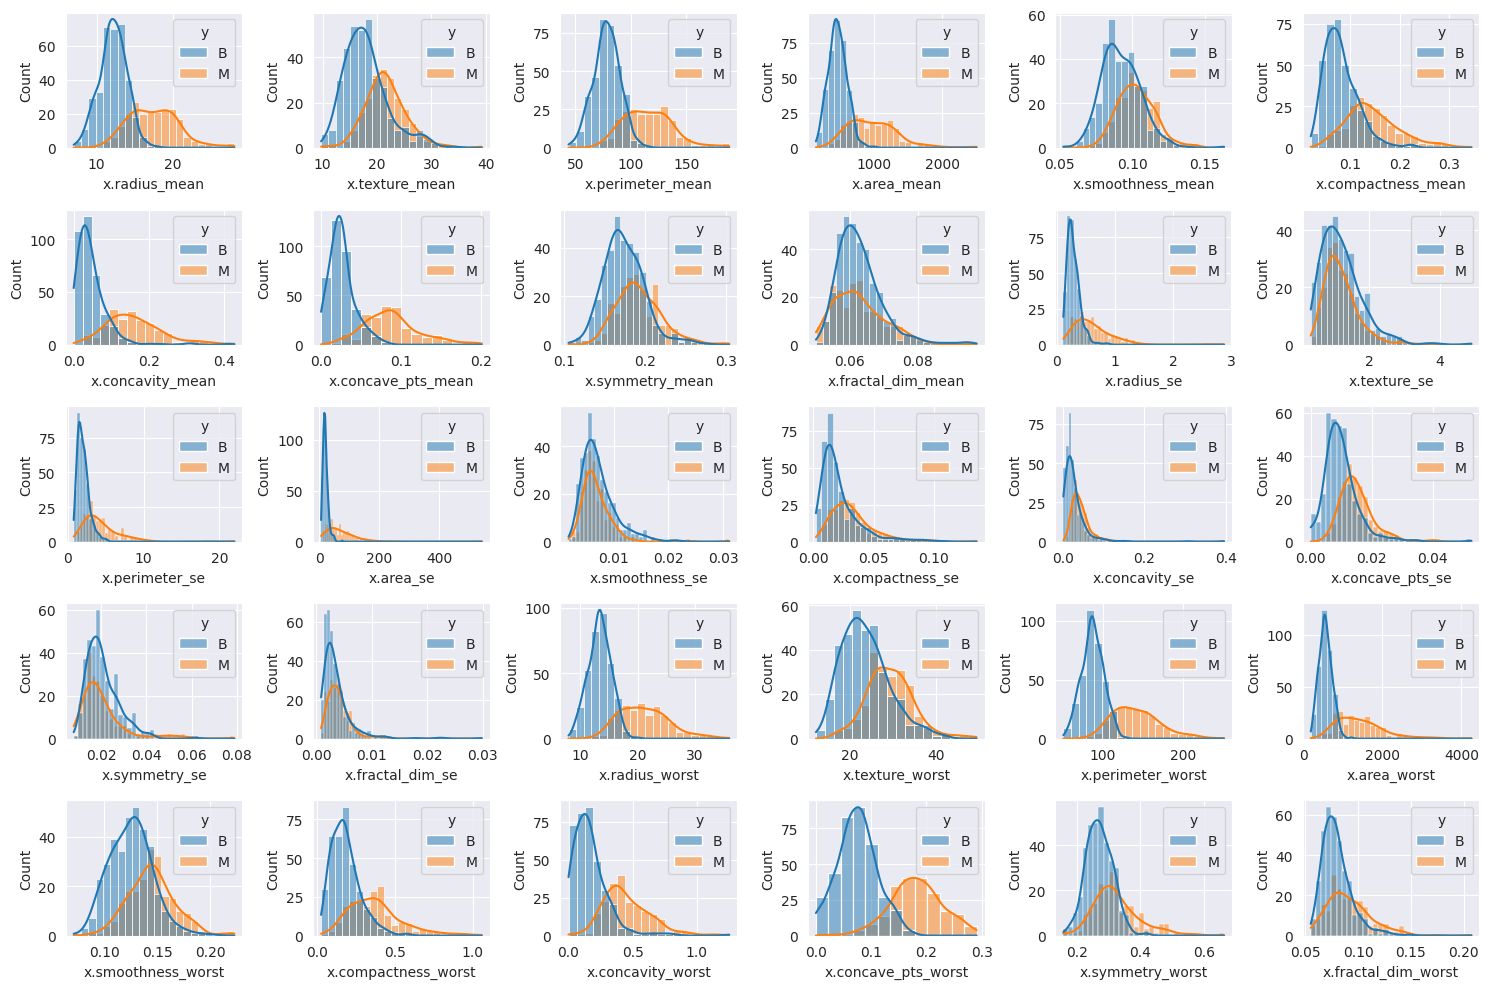

In [9]:
boxplots(df)
histplots(df, False)
histplots(df, True)

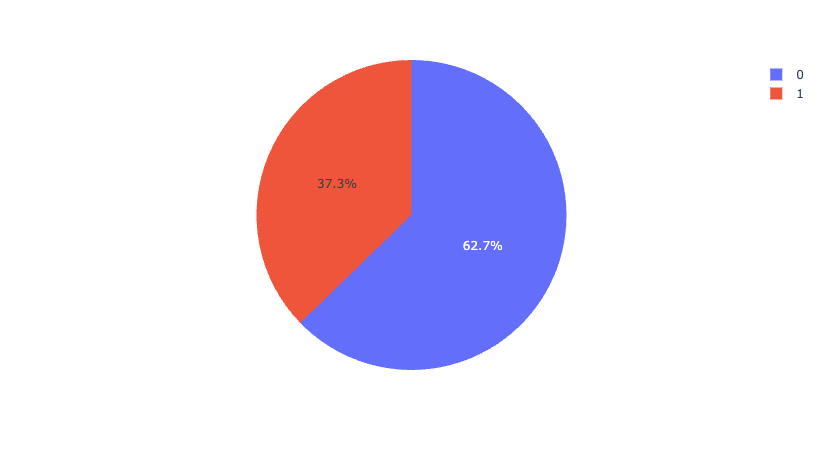

In [31]:
fig = px.pie(df,  
             names='y')
fig.show()

<a id="3"></a>
<h2 style='background:pink; border:0; color:white'><center>3. EDA</center><h2>

# Remove outliers

In [10]:
def outliers_removal(df, i):
    perc = np.percentile(df[i], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - 1.5*iqr
    _max = perc[3] + 1.5*iqr
    df.loc[df[i] > _max, i] = _max
    df.loc[df[i] < _min, i] = _min
    return df

In [11]:
for i in df.columns[:-1]:
    df = outliers_removal(df, i)

# Remove NaN

In [13]:
a = df.isnull().mean()*100
b = a[a>0].sort_values(ascending = False)
b[b>1]

Series([], dtype: float64)

# Data transformation

In [32]:
from sklearn.preprocessing import LabelBinarizer
transformer = preprocessing.LabelBinarizer()
df['y'] = transformer.fit_transform(df.y)

# Analysis of significance of features

<function matplotlib.pyplot.show(close=None, block=None)>

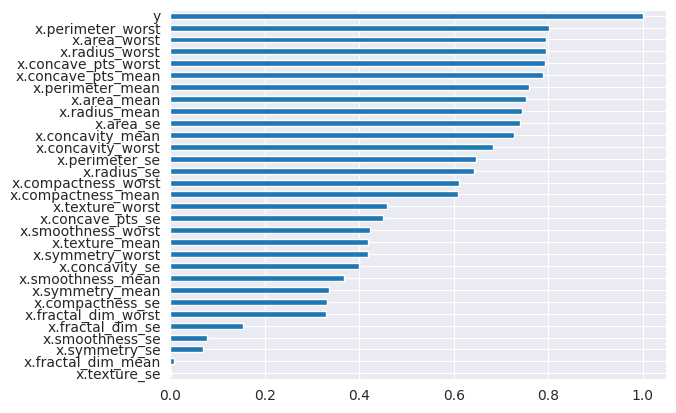

In [34]:
df.corr()['y'].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.show

<AxesSubplot: >

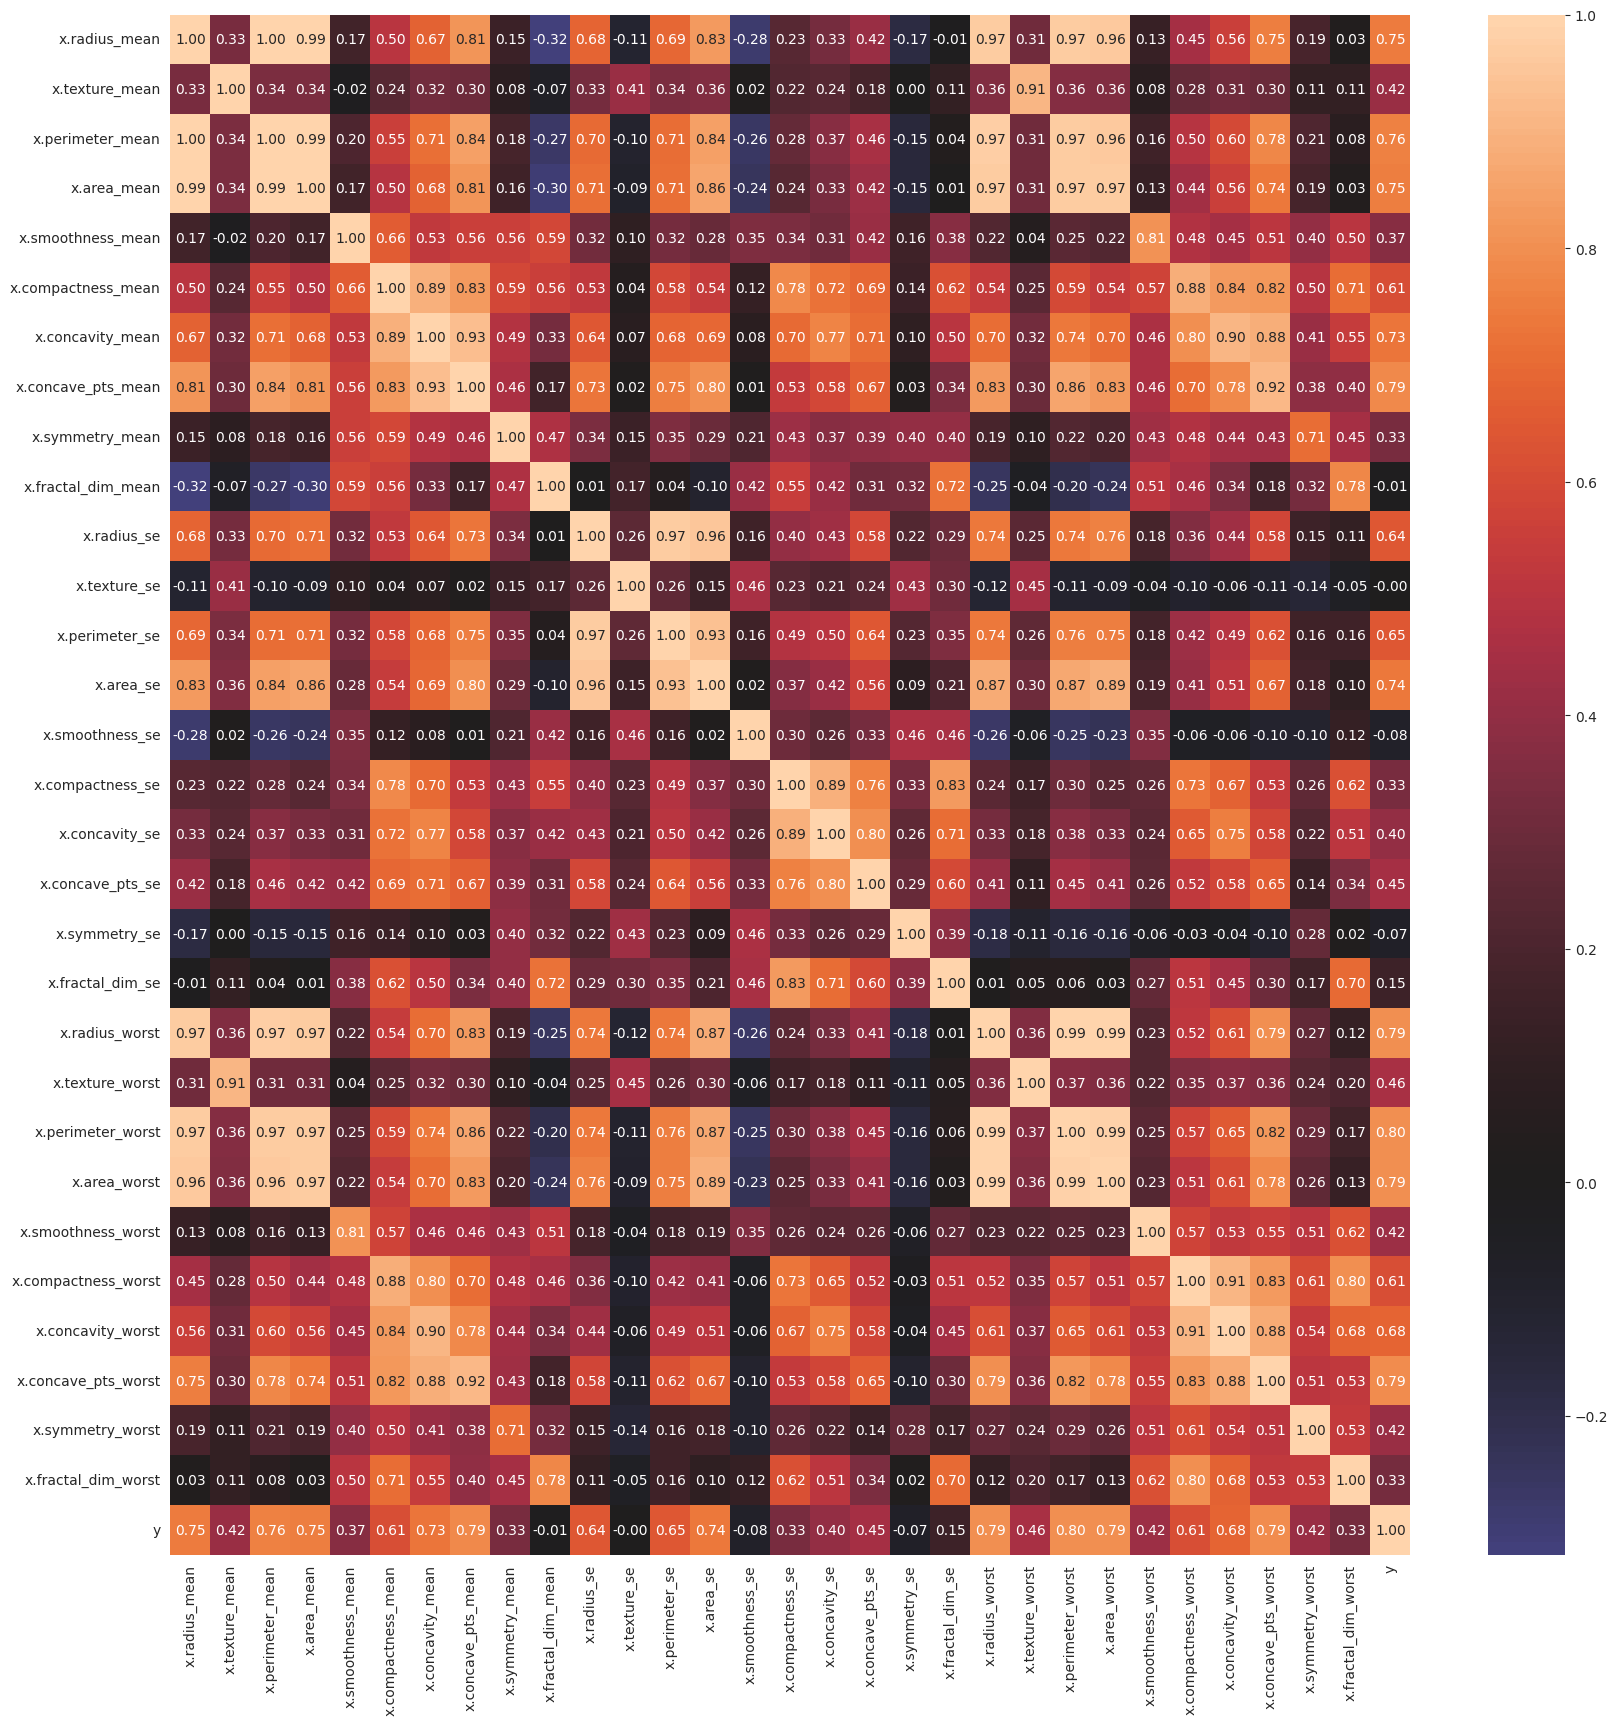

In [35]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(),fmt='.2f',annot=True, center=0)

[Text(0.5, 1, 'x.radius_mean'),
 Text(1.5, 1, 'x.texture_mean'),
 Text(2.5, 1, 'x.perimeter_mean'),
 Text(3.5, 1, 'x.area_mean'),
 Text(4.5, 1, 'x.smoothness_mean'),
 Text(5.5, 1, 'x.compactness_mean'),
 Text(6.5, 1, 'x.concavity_mean'),
 Text(7.5, 1, 'x.concave_pts_mean'),
 Text(8.5, 1, 'x.symmetry_mean'),
 Text(9.5, 1, 'x.fractal_dim_mean'),
 Text(10.5, 1, 'x.radius_se'),
 Text(11.5, 1, 'x.texture_se'),
 Text(12.5, 1, 'x.perimeter_se'),
 Text(13.5, 1, 'x.area_se'),
 Text(14.5, 1, 'x.smoothness_se'),
 Text(15.5, 1, 'x.compactness_se'),
 Text(16.5, 1, 'x.concavity_se'),
 Text(17.5, 1, 'x.concave_pts_se'),
 Text(18.5, 1, 'x.symmetry_se'),
 Text(19.5, 1, 'x.fractal_dim_se'),
 Text(20.5, 1, 'x.radius_worst'),
 Text(21.5, 1, 'x.texture_worst'),
 Text(22.5, 1, 'x.perimeter_worst'),
 Text(23.5, 1, 'x.area_worst'),
 Text(24.5, 1, 'x.smoothness_worst'),
 Text(25.5, 1, 'x.compactness_worst'),
 Text(26.5, 1, 'x.concavity_worst'),
 Text(27.5, 1, 'x.concave_pts_worst'),
 Text(28.5, 1, 'x.symmetry_

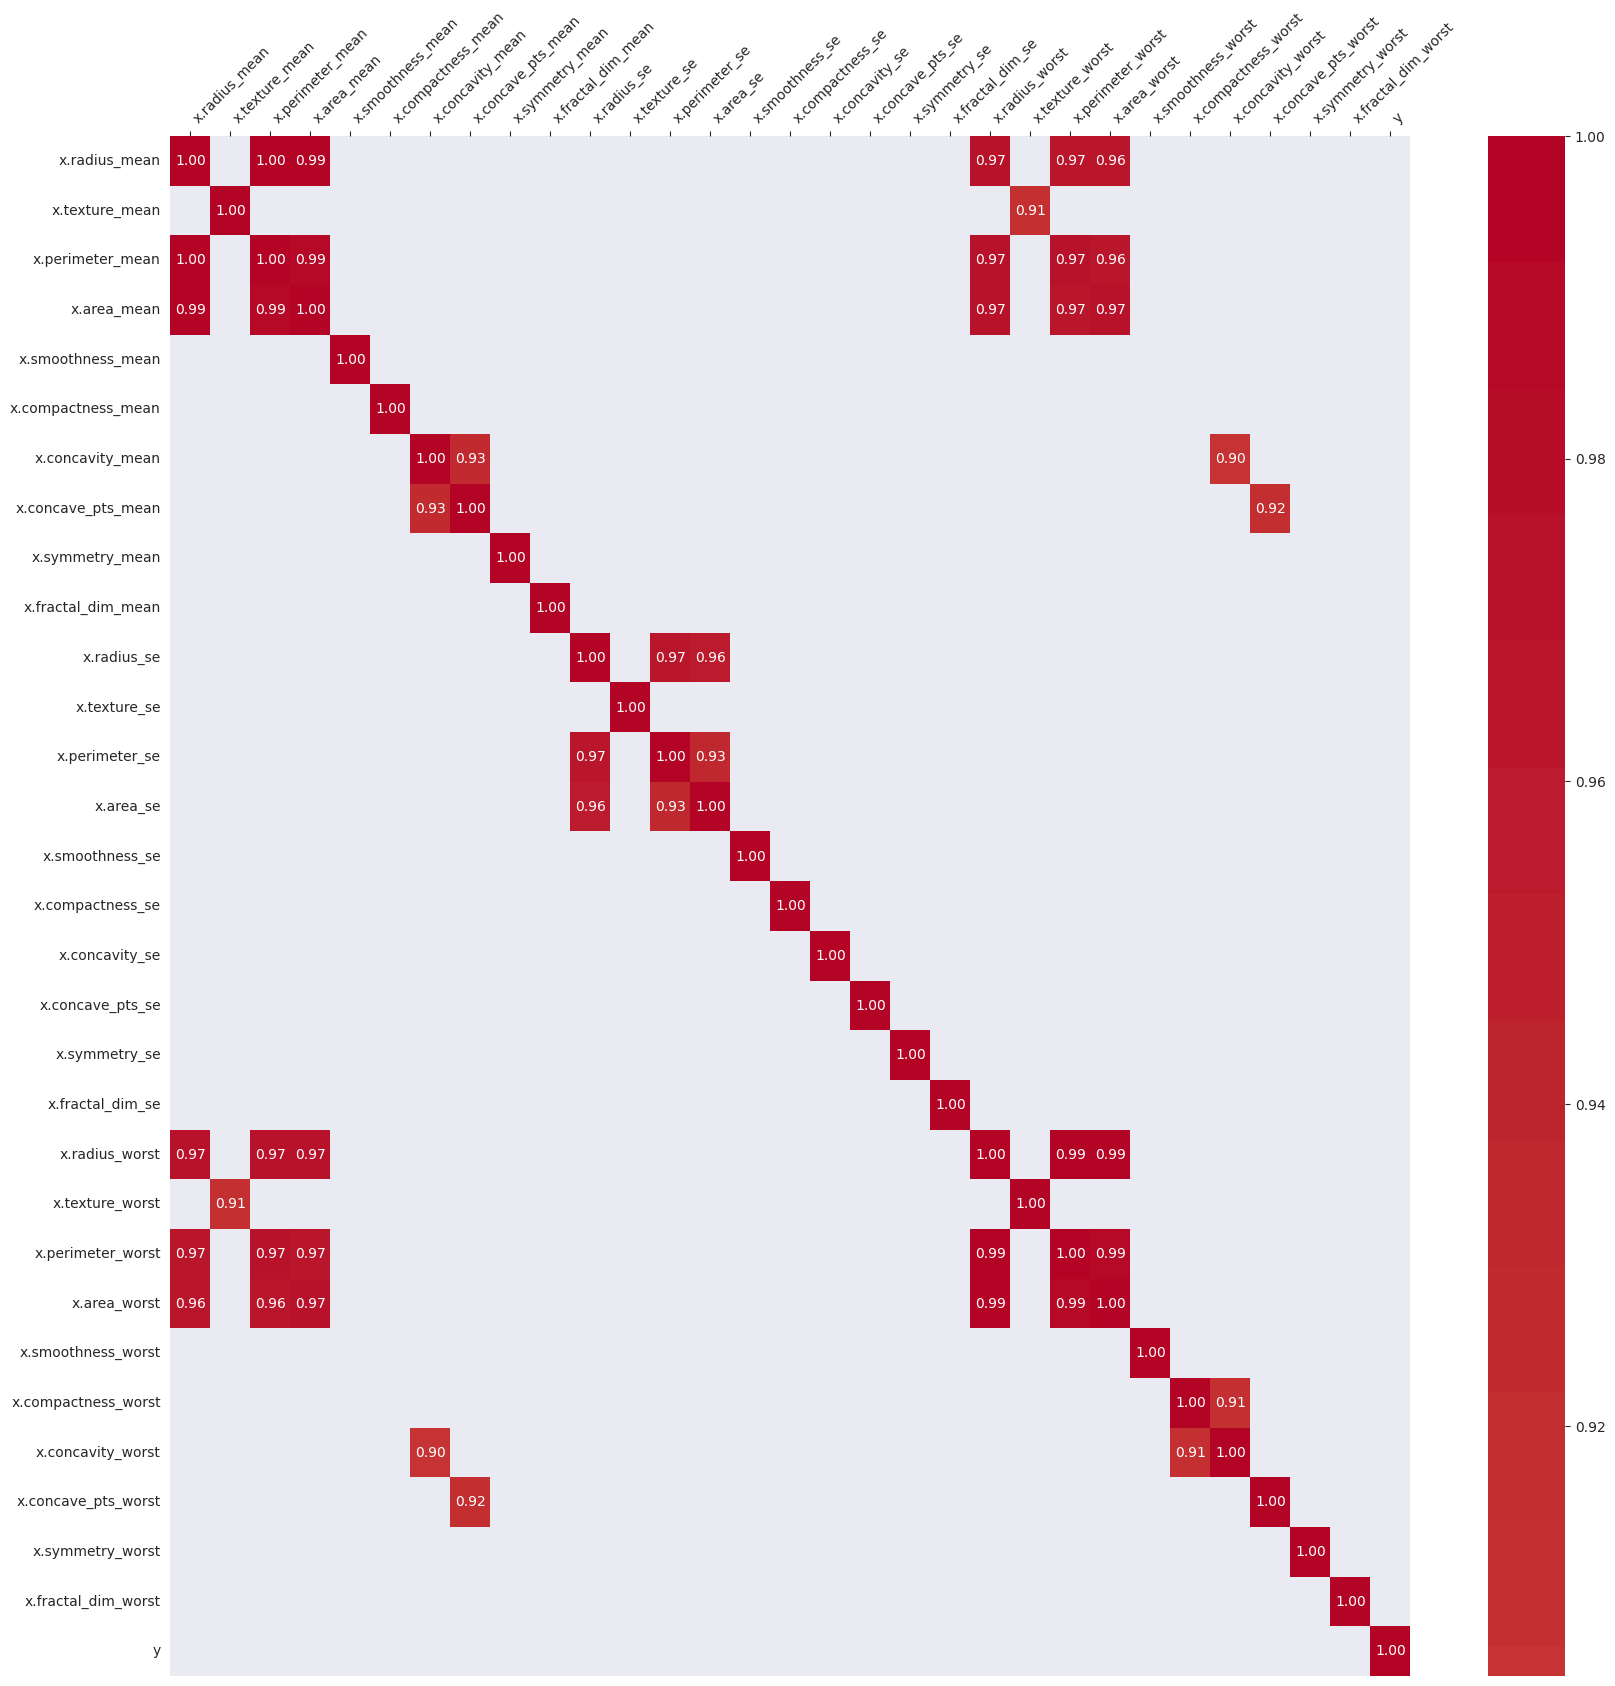

In [39]:
plt.figure(figsize=(20, 20))
corr = df.corr()
high_corr = corr[corr.abs() > 0.9]  # Filter correlations greater than 0.9
sns.heatmap(high_corr, fmt='.2f', annot=True, center=0, cmap='coolwarm')
plt.xticks(rotation=90)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.gca().set_xticklabels(high_corr.columns, rotation=45, ha='left')

In [38]:
corr_matrix = df.corr().abs()  # Compute absolute correlation matrix
high_corr_cols = corr_matrix[corr_matrix > 0.9].any()  # Check if any correlation value is greater than 0.9
high_corr_cols = high_corr_cols[high_corr_cols].index.tolist()  # Get the column names

print(high_corr_cols)

['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se', 'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se', 'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst', 'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst', 'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst', 'x.fractal_dim_worst', 'y']


In [41]:
# remove high correlated cols
cols = ['x.perimeter_mean', 'x.area_mean',
        'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst', 'x.area_worst',
        'x.concavity_worst','x.concave_pts_mean',
       'x.perimeter_se', 'x.area_se']
df.drop(cols, axis=1, inplace = True)

<a id="4"></a>
<h2 style='background:pink; border:0; color:white'><center>4. Classification models</center><h2>

In [44]:
X = df.drop(['y'], axis=1)
y = df['y']

In [45]:
# Applying SMOTE technique
sm = SMOTE(random_state=2)
X_s, y_s = sm.fit_resample(X, y)

print('Train shape before oversampling:', X.shape) 
print('Class balance before oversampling: \n', y.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_s.shape)
print('Class balance after oversampling: \n', y_s.value_counts(), sep='')

Train shape before oversampling: (569, 20)
Class balance before oversampling: 
0    357
1    212
Name: y, dtype: int64
----------------------------------------
Train shape after oversampling: (714, 20)
Class balance after oversampling: 
0    357
1    357
Name: y, dtype: int64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y_s, stratify=y_s, random_state = 42, test_size = 0.33
)

In [53]:
#normalization
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [54]:
# Logistic regression
log_reg = linear_model.LogisticRegression(random_state=42, solver = 'sag', max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)
print('Train df:',metrics.classification_report(y_train, y_pred_train))
print('Test df:',metrics.classification_report(y_test, y_pred_test))

Train df:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       239
           1       0.97      0.97      0.97       239

    accuracy                           0.97       478
   macro avg       0.97      0.97      0.97       478
weighted avg       0.97      0.97      0.97       478

Valid df:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.98      0.99       118

    accuracy                           0.99       236
   macro avg       0.99      0.99      0.99       236
weighted avg       0.99      0.99      0.99       236



# Training and evluation pipeline

In [18]:
def evaluate(model, name, _r=2):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    acc = acc*100
    acc = round(acc, _r)
    title = "{} : {}%".format(name, acc)
    print(title)
    print()

In [19]:
def training(model, name):
    model.fit(x_train, y_train)
    evaluate(model, name)
    return model

In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(C=0.5, kernel='linear')
abc = AdaBoostClassifier(learning_rate=0.1)
rfc = RandomForestClassifier(max_depth=70, criterion='gini')
lgr = LogisticRegression(max_iter=1000)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion='gini', max_depth=50)
xgb = XGBClassifier()
models = [knn, svc, abc, rfc, lgr, gnb, dtc, xgb]
names = ['KNN', 'SVC', 'Ada Boost', 'Random Forest', 
         'Logistic Regression', 'Naive Bayes',
        'Decision Tree', 'XGBoost']

# ML Algorithms benchmarks

In [21]:
trained = []
for i, j in zip(models, names):
    trained += [training(i, j)]

NameError: name 'accuracy_score' is not defined